<a href="https://colab.research.google.com/github/Affiwhizz/lab-image-classification-using-convolutional-neural-networks/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


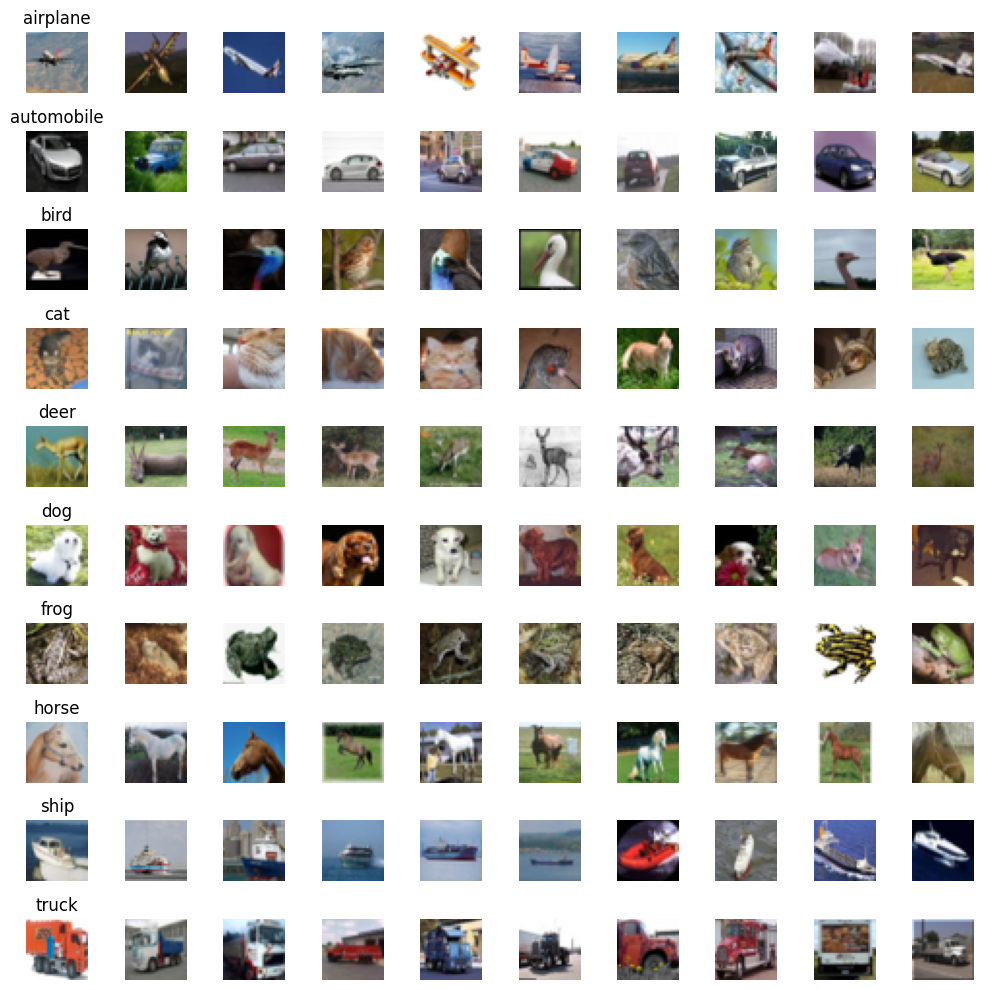

In [3]:
# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Show 10x10 grid of images (10 per class)
plt.figure(figsize=(10, 10))
samples_per_class = 10
for label in range(10):
    idxs = np.flatnonzero(y_train == label)
    chosen = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(chosen):
        plt_idx = label * samples_per_class + i + 1
        plt.subplot(10, 10, plt_idx)
        plt.imshow(x_train[idx])
        plt.axis('off')
        if i == 0:
            plt.title(class_names[label])
plt.tight_layout()
plt.show()

# One-hot encode the labels
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Normalize image pixel values to [0, 1]
x_train_norm = x_train.astype("float32") / 255.0
x_test_norm = x_test.astype("float32") / 255.0

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [4]:
from keras.backend import clear_session
clear_session()

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [6]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train_norm, y_train_cat,
    epochs=50,
    batch_size=512,
    validation_data=(x_test_norm, y_test_cat),
    verbose=2
)

Epoch 1/50
98/98 - 6s - 59ms/step - accuracy: 0.1607 - loss: 2.2641 - val_accuracy: 0.2038 - val_loss: 2.2221
Epoch 2/50
98/98 - 1s - 10ms/step - accuracy: 0.2451 - loss: 2.1648 - val_accuracy: 0.2822 - val_loss: 2.1102
Epoch 3/50
98/98 - 1s - 9ms/step - accuracy: 0.2865 - loss: 2.0544 - val_accuracy: 0.3072 - val_loss: 2.0104
Epoch 4/50
98/98 - 1s - 10ms/step - accuracy: 0.3138 - loss: 1.9728 - val_accuracy: 0.3276 - val_loss: 1.9457
Epoch 5/50
98/98 - 1s - 10ms/step - accuracy: 0.3333 - loss: 1.9189 - val_accuracy: 0.3384 - val_loss: 1.8964
Epoch 6/50
98/98 - 1s - 10ms/step - accuracy: 0.3446 - loss: 1.8805 - val_accuracy: 0.3494 - val_loss: 1.8650
Epoch 7/50
98/98 - 1s - 9ms/step - accuracy: 0.3590 - loss: 1.8497 - val_accuracy: 0.3480 - val_loss: 1.8454
Epoch 8/50
98/98 - 1s - 10ms/step - accuracy: 0.3649 - loss: 1.8236 - val_accuracy: 0.3656 - val_loss: 1.8192
Epoch 9/50
98/98 - 1s - 10ms/step - accuracy: 0.3774 - loss: 1.7958 - val_accuracy: 0.3665 - val_loss: 1.7981
Epoch 10/50


*   Plot the cross entropy loss curve and the accuracy curve

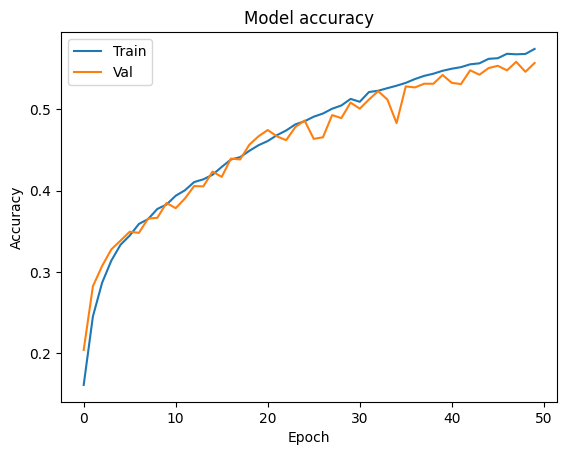

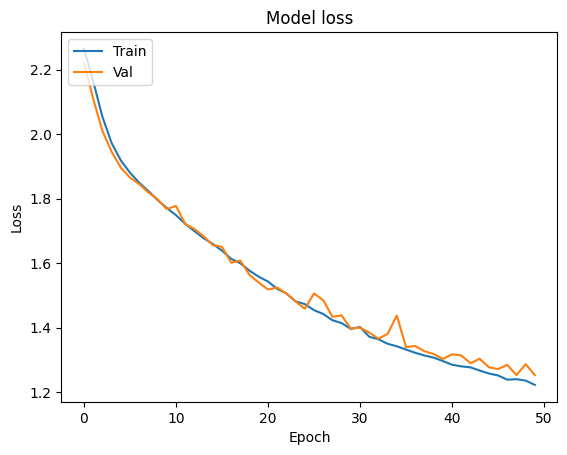

In [7]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [8]:
from keras.backend import clear_session
clear_session()

In [9]:
from tensorflow.keras import models, layers

# Define VGG-style model
vgg_model = models.Sequential()

# Input shape is 32x32x3 for CIFAR-10
vgg_model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
vgg_model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
vgg_model.add(layers.MaxPooling2D((2, 2)))

vgg_model.add(layers.Flatten())
vgg_model.add(layers.Dense(128, activation='relu'))
vgg_model.add(layers.Dense(10, activation='softmax'))

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [10]:
# Compile the model
vgg_model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

# Train the model
history_vgg = vgg_model.fit(
    x_train_norm, y_train_cat,
    epochs=50,
    batch_size=512,
    validation_data=(x_test_norm, y_test_cat),
    verbose=2
)

Epoch 1/50
98/98 - 9s - 92ms/step - accuracy: 0.1822 - loss: 2.2480 - val_accuracy: 0.2237 - val_loss: 2.1822
Epoch 2/50
98/98 - 2s - 21ms/step - accuracy: 0.2418 - loss: 2.1184 - val_accuracy: 0.2449 - val_loss: 2.0651
Epoch 3/50
98/98 - 2s - 21ms/step - accuracy: 0.2862 - loss: 2.0160 - val_accuracy: 0.2865 - val_loss: 2.0172
Epoch 4/50
98/98 - 2s - 21ms/step - accuracy: 0.3162 - loss: 1.9443 - val_accuracy: 0.3276 - val_loss: 1.9159
Epoch 5/50
98/98 - 2s - 21ms/step - accuracy: 0.3449 - loss: 1.8747 - val_accuracy: 0.3622 - val_loss: 1.8181
Epoch 6/50
98/98 - 2s - 21ms/step - accuracy: 0.3656 - loss: 1.8145 - val_accuracy: 0.3512 - val_loss: 1.8378
Epoch 7/50
98/98 - 2s - 21ms/step - accuracy: 0.3813 - loss: 1.7702 - val_accuracy: 0.3850 - val_loss: 1.7376
Epoch 8/50
98/98 - 2s - 21ms/step - accuracy: 0.3940 - loss: 1.7301 - val_accuracy: 0.4047 - val_loss: 1.6949
Epoch 9/50
98/98 - 2s - 21ms/step - accuracy: 0.4076 - loss: 1.6945 - val_accuracy: 0.4041 - val_loss: 1.6898
Epoch 10/5

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


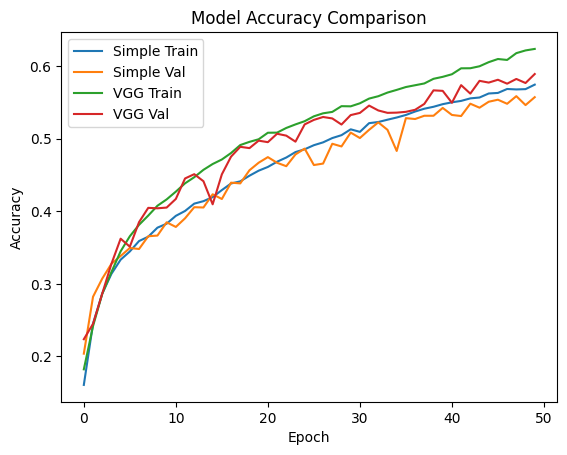

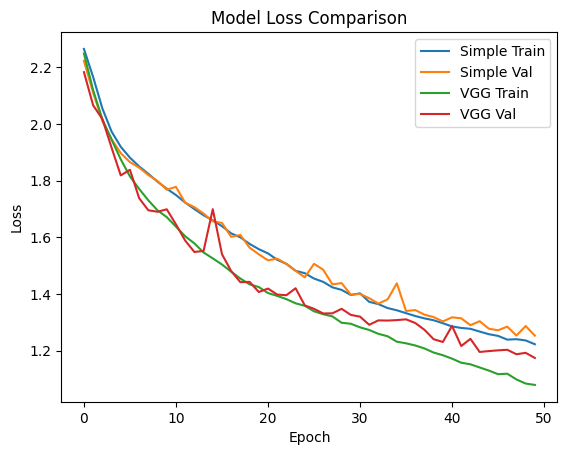

In [11]:
# Compare Accuracy
plt.plot(history.history['accuracy'], label='Simple Train')
plt.plot(history.history['val_accuracy'], label='Simple Val')
plt.plot(history_vgg.history['accuracy'], label='VGG Train')
plt.plot(history_vgg.history['val_accuracy'], label='VGG Val')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Compare Loss
plt.plot(history.history['loss'], label='Simple Train')
plt.plot(history.history['val_loss'], label='Simple Val')
plt.plot(history_vgg.history['loss'], label='VGG Train')
plt.plot(history_vgg.history['val_loss'], label='VGG Val')
plt.title('Model Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

**Comment on the observation**

Accuracy and Loss Comparison:

The VGG model shows consistently higher training and validation accuracy compared to the simple CNN model across all 50 epochs. This suggests that the deeper VGG-style architecture is more effective at capturing complex patterns in the CIFAR-10 dataset.

Validation loss and accuracy for VGG stabilize around epoch 30-40.

The gap between training and validation curves for VGG is relatively small, which implies less overfitting than expected for deeper networks.

in conclusion, The deeper model (VGG) performs better overall. It generalizes well and achieves higher accuracy while maintaining lower loss.

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


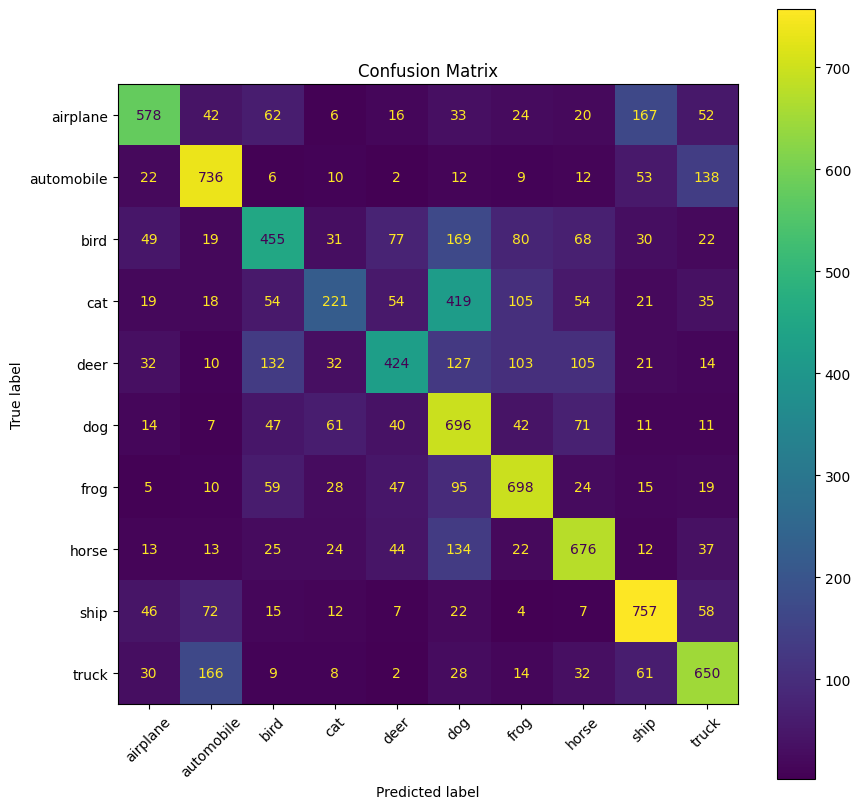

In [12]:
# Predict on test set
y_pred_probs = vgg_model.predict(x_test_norm)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

**Comment here :**

Well-Classified Classes:

High confidence in categories like Ship (757), Automobile (736), Dog (696), and Frog (698).

These categories likely have distinct textures or edges that make them easier for the model to learn.

Frequently Confused Pairs:

Ship vs Airplane (167 misclassifications) — likely due to background similarities (e.g., skies, waterlines).

Cat vs Dog
This continues to be a challenge due to subtle texture and shape differences at low resolution (expected in CIFAR-10).

Bird vs Mammals (Dog 169, Cat 123) — birds seem to be confused with ground animals likely due to posture/position similarity in low resoultion images.

General Insight:

Most predictions lie along the diagonal, indicating good overall classification.

However, harder classes show the model’s limitations in the details showing a great opportunity for:

Data Augmentation (to improve generalization) and transfer learning.

*    Print the test accuracy for the trained model.

In [13]:
# Evaluate on test data
test_loss, test_accuracy = vgg_model.evaluate(x_test_norm, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.5891


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [20]:
import tensorflow as tf

# Resize CIFAR-10 images from 32x32 to 64x64
x_train_resized = tf.image.resize(x_train, [64, 64])
x_test_resized = tf.image.resize(x_test, [64, 64])

# Normalize pixel values
x_train_resized = x_train_resized / 255.0
x_test_resized = x_test_resized / 255.0

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Build VGG-style model from scratch
vgg_defined = Sequential([
    # Block 1
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(),

    # Block 2
    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(),

    # Block 3
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D(),

    # Fully Connected
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile
vgg_defined.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
history_vgg_defined = vgg_defined.fit(
    x_train_resized, y_train_cat,
    epochs=10,
    batch_size=512,
    validation_data=(x_test_resized, y_test_cat),
    verbose=2
)

Epoch 1/10
98/98 - 98s - 998ms/step - accuracy: 0.1464 - loss: 2.2934 - val_accuracy: 0.1196 - val_loss: 2.2979
Epoch 2/10
98/98 - 33s - 338ms/step - accuracy: 0.1984 - loss: 2.1846 - val_accuracy: 0.2937 - val_loss: 1.9869
Epoch 3/10
98/98 - 34s - 342ms/step - accuracy: 0.3522 - loss: 1.8160 - val_accuracy: 0.4352 - val_loss: 1.5730
Epoch 4/10
98/98 - 34s - 345ms/step - accuracy: 0.4792 - loss: 1.4685 - val_accuracy: 0.5104 - val_loss: 1.3810
Epoch 5/10
98/98 - 34s - 347ms/step - accuracy: 0.5398 - loss: 1.3129 - val_accuracy: 0.5341 - val_loss: 1.2891
Epoch 6/10
98/98 - 34s - 349ms/step - accuracy: 0.5869 - loss: 1.1812 - val_accuracy: 0.5878 - val_loss: 1.1656
Epoch 7/10
98/98 - 34s - 351ms/step - accuracy: 0.6290 - loss: 1.0626 - val_accuracy: 0.6062 - val_loss: 1.1181
Epoch 8/10
98/98 - 35s - 355ms/step - accuracy: 0.6616 - loss: 0.9626 - val_accuracy: 0.6283 - val_loss: 1.0859
Epoch 9/10
98/98 - 35s - 356ms/step - accuracy: 0.6929 - loss: 0.8784 - val_accuracy: 0.6363 - val_loss:

In [23]:
# Predict
y_pred_probs = vgg_defined.predict(x_test_resized)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


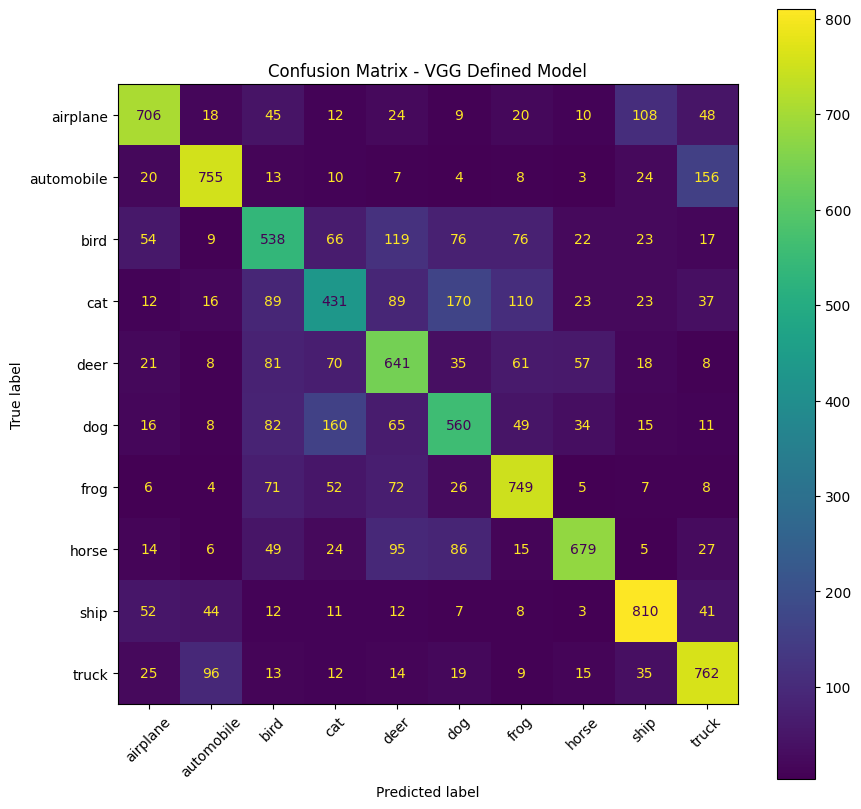

In [26]:
# CIFAR-10 class labels
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

# Predict on test set
y_pred_probs = vgg_defined.predict(x_test_resized)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, xticks_rotation=45)
plt.title("Confusion Matrix - VGG Defined Model")
plt.show()

Model Improvements:

Compared to earlier models, this fine-tuned VGG architecture significantly improves accuracy and class separation, achieving over 73% training accuracy and 66% validation accuracy in just 10 epochs.

The confusion matrix shows fewer off-diagonal errors, suggesting better generalization.

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:
Activation functions introduce non-linearity into the network, basically they help neural networks learn more complex patterns. Without them, the network would just be doing simple math, like drawing a straight line through data. By adding activation functions, we allow the network to capture or dtect patterns that aren’t obvious or linear, like shapes, curves, or edges in an image. Basically, they help the model “think” in more flexible ways and make better decisions.


2 - Key Differences between sigmoid and softmax: Sigmoid and softmax both squish numbers down into a range between 0 and 1, but they’re used a bit differently from what i have seen.
Sigmoid outputs a value between 0 and 1 for each individual neuron, mostly used in binary classification when we just want to predict one thing like yes or no or multi-label problems where each output is treated independently.

Softmax, on the other hand, is better when we have several possible classes and only one can be correct it basically applies a probability distribution over all classes. its like picking one label out of ten. It gives us a probability for each class and makes sure they all add up to 1.



3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Binary Crossentropy is used for binary classification or multi-label classification, with outputs between 0 and 1 per label. Basically when there are only two possibe outcomes. It evaluates the difference between predicted probability and actual label (0 or 1) for each class individually.

Categorical Crossentropy is used for multi-class classification with one-hot encoded labels and multiple output neurons (e.g., 10 for CIFAR-10). It compares the predicted probability distribution with the true class.